# Midiendo rendimiento y riesgo con datos históricos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Ya sabemos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> En la clase pasada vimos como obtener reportes históricos de precios de activos. ¿Cómo usamos estos históricos para medir el rendimiento esperado y la volatilidad de los rendimientos?

*Objetivos:*
- Calcular los rendimientos a partir de históricos de precios.
- Estimar rendimiento esperado y riesgo a partir de históricos de rendimientos.
- Anualizar rendimiento y volatilidad cuando los datos están en una base de tiempo menor.
- Verificar la relación entre rendimiento y riesgo a través de datos reales.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Cálculo de los rendimientos

Muy bien, ya entonces sabemos descargar históricos de precios...

**Ejemplo:** trabajaremos esta clase con activos que se encuentran en el top-10 del índice S&P500. Descargar precios ajustados en el cierre de Microsoft (MSFT), Apple (AAPL), Amazon (AMZN), Facebook (FB) y Alphabet Inc. (GOOGL) desde el primero de enero del 2015 hasta hoy.

In [1]:
# Importar paquetes
import pandas_datareader.data as web
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
# Información
tickers = ["MSFT", "AAPL", "AMZN", "FB", "GOOGL"]
start = "2015-01-01"

In [4]:
# Precios diarios ajustados en el cierre
closes = get_adj_closes(tickers=tickers,
                        start_date=start)

In [5]:
closes.head()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2015-01-02,41.193840,24.714506,308.519989,78.449997,529.549988
2015-01-05,40.815025,24.018263,302.190002,77.190002,519.460022
2015-01-06,40.215973,24.020523,295.290009,76.150002,506.640015
2015-01-07,40.726929,24.357340,298.420013,76.150002,505.149994
2015-01-08,41.925041,25.293211,300.459991,78.180000,506.910004


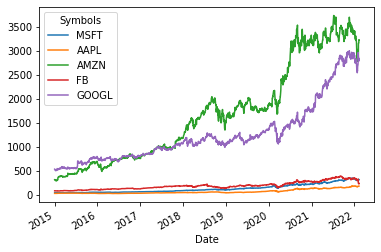

In [6]:
# Gráfico de histórico de precios diarios
closes.plot()

### 1.1. Rendimientos porcentuales

Muy bien, pero para el análisis no trabajamos con los precios sino con los rendimientos... **¿porqué?**

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

*¡Cuidado!* los rendimientos son de acuerdo a la base de tiempo en que se reportan los precios. Por ejemplo: 
- si los precios se reportan en una base diaria, los rendimientos también son diarios;
- si los precios se reportan en una base mensual, los rendimientos también son mensuales.

In [7]:
# S_t
St = closes
St.head()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2015-01-02,41.193840,24.714506,308.519989,78.449997,529.549988
2015-01-05,40.815025,24.018263,302.190002,77.190002,519.460022
2015-01-06,40.215973,24.020523,295.290009,76.150002,506.640015
2015-01-07,40.726929,24.357340,298.420013,76.150002,505.149994
2015-01-08,41.925041,25.293211,300.459991,78.180000,506.910004


In [8]:
# S_{t-1}
Stm1 = closes.shift()
Stm1.head()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,41.193840,24.714506,308.519989,78.449997,529.549988
2015-01-06,40.815025,24.018263,302.190002,77.190002,519.460022
2015-01-07,40.215973,24.020523,295.290009,76.150002,506.640015
2015-01-08,40.726929,24.357340,298.420013,76.150002,505.149994


In [9]:
rt = (St - Stm1) / Stm1

In [10]:
rt.head()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.009196,-0.028171,-0.020517,-0.016061,-0.019054
2015-01-06,-0.014677,0.000094,-0.022833,-0.013473,-0.024679
2015-01-07,0.012705,0.014022,0.010600,0.000000,-0.002941
2015-01-08,0.029418,0.038423,0.006836,0.026658,0.003484


In [11]:
# Calcular rendimientos
ret = closes.pct_change().dropna()
ret.head()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2015-01-05,-0.009196,-0.028171,-0.020517,-0.016061,-0.019054
2015-01-06,-0.014677,0.000094,-0.022833,-0.013473,-0.024679
2015-01-07,0.012705,0.014022,0.010600,0.000000,-0.002941
2015-01-08,0.029418,0.038423,0.006836,0.026658,0.003484
2015-01-09,-0.008405,0.001072,-0.011749,-0.005628,-0.012211


`NaN`: Not A Number

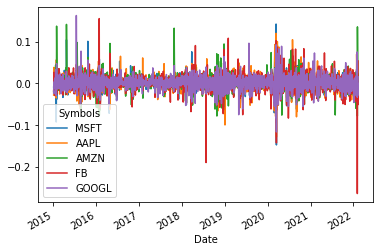

In [12]:
# Graficar...
ret.plot()

**¿Qué se observa respecto a los precios?**

Respuestas:
- Los rendimientos parecen conservar tendecias estadísticas constantes (por ejemplo, oscilan al rededor de números cercanos a cero). 

### 1.2. Rendimientos logarítmicos (log-rendimientos)

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

<font color=blue>Ver en el tablero</font> que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

In [13]:
x = np.linspace(-0.8, 2, 100)
y1 = x
y2 = np.log(1 + x)

In [14]:
from matplotlib import pyplot as plt

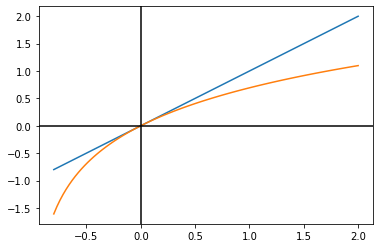

In [15]:
plt.plot(x, y1, x, y2)
plt.axvline(x=0, c='k')
plt.axhline(y=0, c='k')

In [16]:
# ¿Cómo calcular S_{t-1}?
closes.shift()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,41.193840,24.714506,308.519989,78.449997,529.549988
2015-01-06,40.815025,24.018263,302.190002,77.190002,519.460022
2015-01-07,40.215973,24.020523,295.290009,76.150002,506.640015
2015-01-08,40.726929,24.357340,298.420013,76.150002,505.149994
...,...,...,...,...,...
2022-02-03,313.459991,175.616257,3012.250000,323.000000,2960.000000
2022-02-04,301.250000,172.679993,2776.909912,237.759995,2861.800049
2022-02-07,305.940002,172.389999,3152.790039,237.089996,2865.860107


In [17]:
# Calcular rendimientos continuamente compuestos
log_ret = np.log(closes / closes.shift()).dropna()

In [18]:
log_ret.head()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2015-01-05,-0.009238,-0.028576,-0.020731,-0.016191,-0.019238
2015-01-06,-0.014786,0.000094,-0.023098,-0.013565,-0.024989
2015-01-07,0.012625,0.013925,0.010544,0.000000,-0.002945
2015-01-08,0.028994,0.037703,0.006813,0.026309,0.003478
2015-01-09,-0.008441,0.001072,-0.011818,-0.005644,-0.012286


In [19]:
# Recordar rendimientos porcentuales. Ver que son similares
ret.head()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2015-01-05,-0.009196,-0.028171,-0.020517,-0.016061,-0.019054
2015-01-06,-0.014677,0.000094,-0.022833,-0.013473,-0.024679
2015-01-07,0.012705,0.014022,0.010600,0.000000,-0.002941
2015-01-08,0.029418,0.038423,0.006836,0.026658,0.003484
2015-01-09,-0.008405,0.001072,-0.011749,-0.005628,-0.012211


In [35]:
# Veamos el valor absoluto de la diferencia
np.abs(ret - log_ret)

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Date,,,,,
2015-01-05,0.000043,4.044395e-04,0.000213,1.303776e-04,0.000184
2015-01-06,0.000109,4.453565e-09,0.000265,9.158795e-05,0.000310
2015-01-07,0.000080,9.739719e-05,0.000056,0.000000e+00,0.000004
2015-01-08,0.000424,7.197668e-04,0.000023,3.491306e-04,0.000006
2015-01-09,0.000036,5.748412e-07,0.000070,1.589726e-05,0.000075
...,...,...,...,...,...
2022-01-27,0.000055,4.339760e-06,0.000015,5.771039e-10,0.000002
2022-01-28,0.000387,2.326828e-03,0.000473,2.833633e-04,0.000555
2022-01-31,0.000039,3.354471e-04,0.000736,7.145705e-04,0.000106


Por lo anterior, muchas veces se usan para el análisis los rendimientos continuamente compuestos.
___

## 2. Caracterización de la distribución de los rendimientos

Entonces:
- partimos de que tenemos los rendimientos porcentuales diarios de Microsoft (MSFT), Apple (AAPL), Amazon (AMZN), Facebook (FB) y Alphabet Inc. (GOOGL) desde inicios del 2011 a finales del 2015;
- ¿cómo resumirían estos datos?

In [36]:
# Rendimiento medio diario (media aritmética)
ret.mean()

Symbols
MSFT     0.001283
AAPL     0.001267
AMZN     0.001457
FB       0.000992
GOOGL    0.001105
dtype: float64

In [37]:
# Volatilidad diaria (desviación estándar)
ret.std()

Symbols
MSFT     0.017008
AAPL     0.018312
AMZN     0.019020
FB       0.019894
GOOGL    0.016775
dtype: float64

In [20]:
# Podemos resumir en un DataFrame
summary = pd.DataFrame({
    'Mean': ret.mean(),
    'Vol': ret.std()
}).T
summary

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Mean,0.001276,0.001266,0.001498,0.00083,0.001078
Vol,0.017028,0.018297,0.019353,0.02091,0.016789


Normalmente se reportan rendimientos esperados y volatilidades en una base anual. Para anualizar:

$$E[r_a]=12E[r_m]=252E[r_d]=52E[r_w],\text{ y}$$

$$\sigma_{r_a}=\sqrt{12}\sigma_{r_m}=\sqrt{252}\sigma_{r_d}=\sqrt{52}\sigma_{r_w}$$

In [21]:
# Resumen en base anual
annual_summary = pd.DataFrame({
    'Mean': 252 * ret.mean(),
    'Vol': 252**0.5 * ret.std()
}).T
annual_summary

Symbols,MSFT,AAPL,AMZN,FB,GOOGL
Mean,0.321504,0.319092,0.377458,0.209194,0.271624
Vol,0.270311,0.290458,0.307223,0.331944,0.266518


In [22]:
annual_summary.columns

Index(['MSFT', 'AAPL', 'AMZN', 'FB', 'GOOGL'], dtype='object', name='Symbols')

Text(0, 0.5, 'Rendimiento esperado $E[r]$')

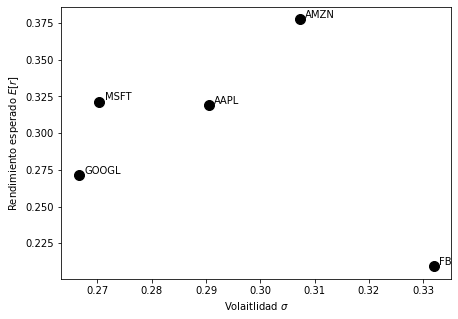

In [29]:
# Gráfico rendimiento esperado vs. volatilidad
plt.figure(figsize=(7, 5))
plt.plot(annual_summary.loc['Vol'],  # eje x
         annual_summary.loc['Mean'],  # eje y
         'ok',  # Estilo de gráfico
         ms=10  # Tamaño de marcadores (marker size)
        )
for stock in annual_summary.columns:
    plt.text(annual_summary.loc['Vol', stock] + 0.001,
             annual_summary.loc['Mean', stock] + 0.001,
             stock)
plt.xlabel("Volaitlidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")

### 2.1 Ajuste de curvas con mínimos cuadrados
Consideramos que tenemos un conjunto de n pares ordenados de datos $(\sigma_{r_i},E[r_i])$, para $i=1,2,3,\dots,n$... **en este caso corresponden a volatilidad y rendimiento esperado**

#### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(\sigma) = \beta_0+\beta_1 \sigma = \left[1 \quad \sigma\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad \sigma\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $\sigma_{r_i}$ ($\hat{f}(\sigma_{r_i})$) aproxime los valores correspondientes $E[r_i]$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(E[r_i]-\hat{f}(\sigma_{r_i}))^2$$

In [30]:
# Importar el módulo optimize de la librería scipy
from scipy.optimize import minimize

In [31]:
# Funcion minimize
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [32]:
# Funcion objetivo y condicion inicial
def fun_obj(beta, x, y):
    recta = beta[0] + beta[1] * x
    errores = y - recta
    return (errores**2).mean()

beta_ini = [0, 0]

In [38]:
# Resolver problema de optimizacion
sol = minimize(fun=fun_obj,
               x0=beta_ini,
               args=(annual_summary.loc['Vol'].drop('FB'),
                     annual_summary.loc['Mean'].drop('FB')))

In [39]:
sol

      fun: 0.0003215574291401053
 hess_inv: array([[ 150.37658906, -528.42749539],
       [-528.42749539, 1863.10363323]])
      jac: array([2.54658516e-11, 8.00355338e-11])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([-0.24755121,  2.0095741 ])

In [40]:
beta = sol.x

In [41]:
beta

array([-0.24755121,  2.0095741 ])

Text(0, 0.5, 'Rendimiento esperado $E[r]$')

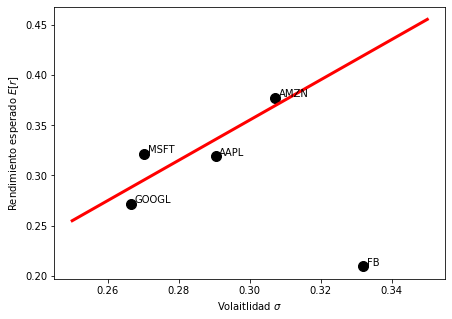

In [42]:
# Gráfico rendimiento esperado vs. volatilidad
plt.figure(figsize=(7, 5))
plt.plot(annual_summary.loc['Vol'],  # eje x
         annual_summary.loc['Mean'],  # eje y
         'ok',  # Estilo de gráfico
         ms=10  # Tamaño de marcadores (marker size)
        )
for stock in annual_summary.columns:
    plt.text(annual_summary.loc['Vol', stock] + 0.001,
             annual_summary.loc['Mean', stock] + 0.001,
             stock)
    
x = np.linspace(0.25, 0.35)
plt.plot(x, beta[0] + beta[1] * x, 'r', lw=3)
plt.xlabel("Volaitlidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")

In [43]:
beta

array([-0.24755121,  2.0095741 ])

**¿Qué se puede concluir acerca de la relación entre riesgo (medido con la volatilidad) y el rendimiento esperado (medido con la media)?**

Respuestas:
- La pendiente de la recta es positiva, lo que confirma la relación positiva entre rendimiento esperado y riesgo.
- Si el mercado solo estuviera dado por los cuatro activos analizados (GOOGL, MSFT, AAPL, AMZN), la tasa libre de riesgo sería $-0.24$.
- Por cada unidad de riesgo (volatilidad), el rendimiento esperado aumenta $2$.

## 3. Comentarios finales acerca del uso de datos históricos.

### ¡Cuidado!
- Es cierto que los patrones que vemos sobre periodos largos de tiempo en diferentes tipos de intrumentos son muy robustos en términos de la relación rendimiento/riesgo (positiva).
- Por tanto, esperamos rendimientos más altos en el futuro cuando asumimos cierto riesgo.
- ¿Cómo encontramos ese 'rendimiento esperado'? Datos históricos (humanos: tendencia a generalizar)

- Entonces, la idea es que si los rendimientos esperados son un p.e. estacionario, el promedio de muchos rendimientos pasados es una buena estimación del rendimiento esperado futuro (Teorema del límite central).
- ¿Deberíamos pensarlo dos veces?

## SI

Problemas:
- La muestra de datos en el periodo específico de tiempo puede estar sesgada.
- Ventanas de tiempo más grandes reducen especificidad de la muestra y estimados más precisos.
 - Aún así, datos muy viejos pueden ser no representativos.
- Nuevos fondos o estrategias de inversión están a menudo sesgados positivamente:
 - reporte de resultados en tiempos voluntarios;
 - las que mueren (no funcionan), no se reportan;

# Anuncios parroquiales:
## 1. Fin Módulo 1. Revisar que se hayan cumplido los objetivos del módulo (Clase0)
## 2. Tarea: revisar archivo "Tarea3_MidiendoRendimientoRiesgo" en clase. Para el lunes 14 de febrero.
## 3. Segunde entrega tarea 2 para el viernes 11 de febrero.
## 4. Recordar quiz la siguiente clase.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>